/content/model/attention_ocr/python
TensorFlow 1.x selected.


I0503 10:39:16.027903 140615858927488 fsns.py:130] Using FSNS dataset split_name=train dataset_dir=/content/model/attention_ocr/python/datasets/data/fsns


Predicted strings:
Reading /content/model/attention_ocr/python/testdata/fsns_train_00.png
Reading /content/model/attention_ocr/python/testdata/fsns_train_01.png
Reading /content/model/attention_ocr/python/testdata/fsns_train_02.png
Reading /content/model/attention_ocr/python/testdata/fsns_train_03.png
Reading /content/model/attention_ocr/python/testdata/fsns_train_04.png
Reading /content/model/attention_ocr/python/testdata/fsns_train_05.png
Reading /content/model/attention_ocr/python/testdata/fsns_train_06.png
Reading /content/model/attention_ocr/python/testdata/fsns_train_07.png
Reading /content/model/attention_ocr/python/testdata/fsns_train_08.png
Reading /content/model/attention_ocr/python/testdata/fsns_train_09.png
Reading /content/model/attention_ocr/python/testdata/fsns_train_10.png
Reading /content/model/attention_ocr/python/testdata/fsns_train_11.png
Reading /content/model/attention_ocr/python/testdata/fsns_train_12.png
Reading /content/model/attention_ocr/python/testdata/fsns_

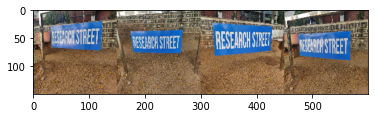

Predicted read: Résearch Street░░░░░░░░░░░░░░░░░░░░░░
Actual read: RESEARCH STREET


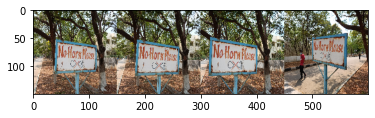

Predicted read: Rue de Coulette░░░░░░░░░░░░░░░░░░░░░░
Actual read: No Horn Please


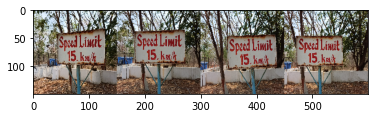

Predicted read: Rue de la Maine░░░░░░░░░░░░░░░░░░░░░░
Actual read: Speed Limit 15kmph


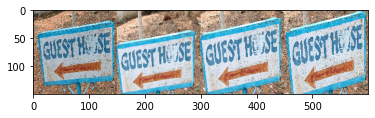

Predicted read: Rue de la Pare░░░░░░░░░░░░░░░░░░░░░░░
Actual read: GUEST HOUSE


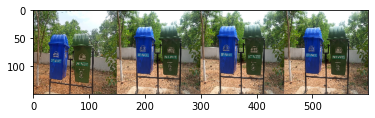

Predicted read: Rue de la Reure░░░░░░░░░░░░░░░░░░░░░░
Actual read: DRY WASTE


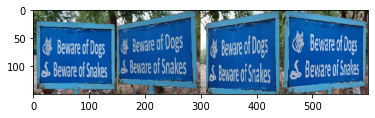

Predicted read: Benare des Benarie Ot Magres░░░░░░░░░
Actual read: Beware of Dogs Beware of Snakes


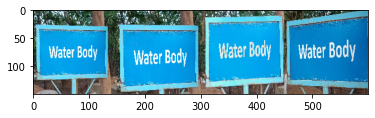

Predicted read: Rue Water Body░░░░░░░░░░░░░░░░░░░░░░░
Actual read: Water Body


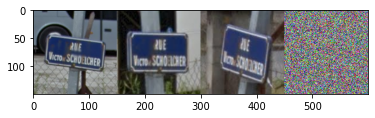

Predicted read: Rue Victor Schoulcher░░░░░░░░░░░░░░░░
Actual read: 


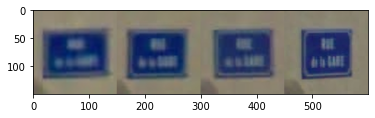

Predicted read: Rue de la Gare░░░░░░░░░░░░░░░░░░░░░░░
Actual read: 


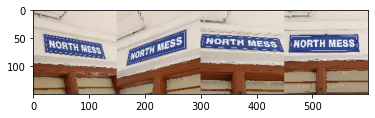

Predicted read: Rue North Mess░░░░░░░░░░░░░░░░░░░░░░░
Actual read: NORTH MESS


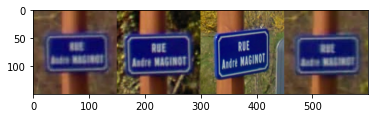

Predicted read: Rue André Maginot░░░░░░░░░░░░░░░░░░░░
Actual read: 


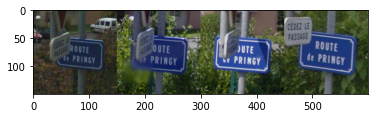

Predicted read: Route de Pringy░░░░░░░░░░░░░░░░░░░░░░


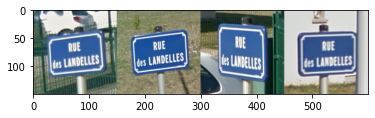

Predicted read: Rue des Landelles░░░░░░░░░░░░░░░░░░░░


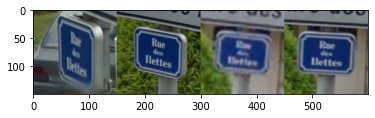

Predicted read: Rue des Ilettes░░░░░░░░░░░░░░░░░░░░░░


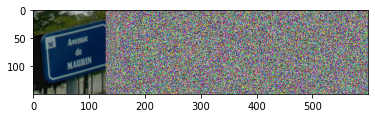

Predicted read: Avenue de Maurin░░░░░░░░░░░░░░░░░░░░░


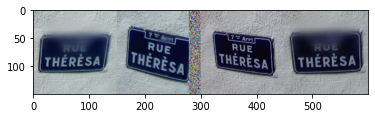

Predicted read: Rue Théresa░░░░░░░░░░░░░░░░░░░░░░░░░░


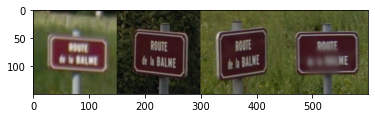

Predicted read: Route de la Balme░░░░░░░░░░░░░░░░░░░░


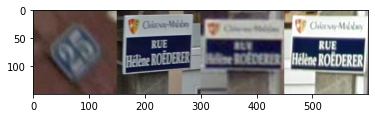

Predicted read: Rue Hélène Roederer░░░░░░░░░░░░░░░░░░


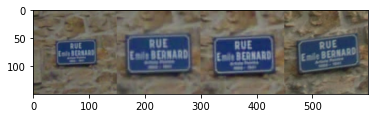

Predicted read: Rue Emile Bernard░░░░░░░░░░░░░░░░░░░░


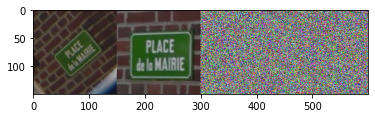

Predicted read: Place de la Mairie░░░░░░░░░░░░░░░░░░░


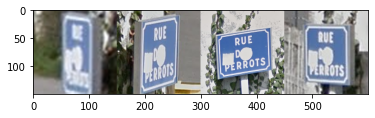

Predicted read: Rue des Perrots░░░░░░░░░░░░░░░░░░░░░░


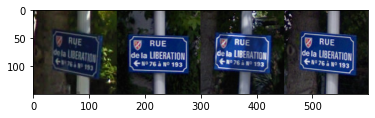

Predicted read: Rue de la Libération░░░░░░░░░░░░░░░░░


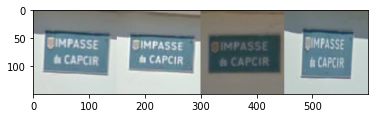

Predicted read: Impasse du Capcir░░░░░░░░░░░░░░░░░░░░


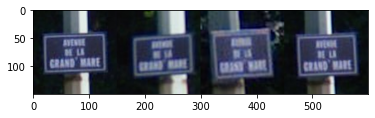

Predicted read: Avenue de la Grand Mare░░░░░░░░░░░░░░


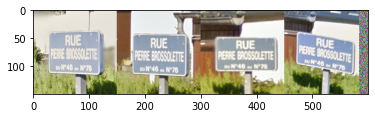

Predicted read: Rue Pierre Brossolette░░░░░░░░░░░░░░░


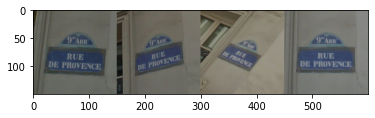

Predicted read: Rue de Provence░░░░░░░░░░░░░░░░░░░░░░


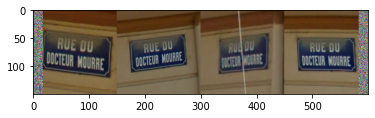

Predicted read: Rue du Docteur Mourre░░░░░░░░░░░░░░░░


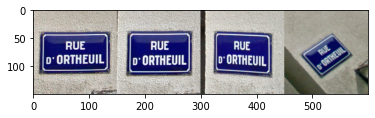

Predicted read: Rue d‘Ortheuil░░░░░░░░░░░░░░░░░░░░░░░


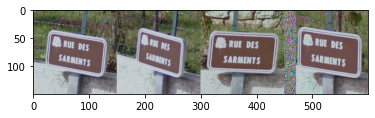

Predicted read: Rue des Sarments░░░░░░░░░░░░░░░░░░░░░


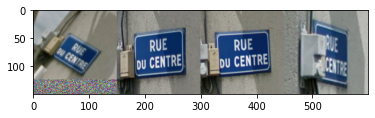

Predicted read: Rue du Centre░░░░░░░░░░░░░░░░░░░░░░░░


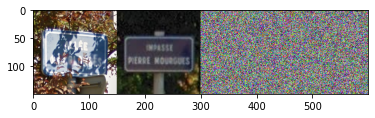

Predicted read: Impasse Pierre Mourgues░░░░░░░░░░░░░░


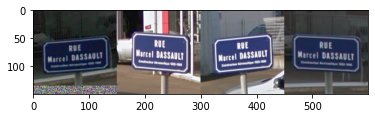

Predicted read: Rue Marcel Dassault░░░░░░░░░░░░░░░░░░



In [ ]:

%tensorflow_version 1.x

import numpy as np
import PIL.Image

import tensorflow as tf
from tensorflow.compat.v1 import flags
from tensorflow.python.training import monitored_session

import common_flags
import datasets
import data_provider
import matplotlib.pyplot as plt

import glob
tf.logging.set_verbosity(tf.logging.ERROR)
FLAGS = flags.FLAGS
common_flags.define()
actual = ["RESEARCH STREET","No Horn Please","Speed Limit 15kmph","GUEST HOUSE","DRY WASTE","Beware of Dogs Beware of Snakes","Water Body","","","NORTH MESS",""]
flags.DEFINE_string('image_path_pattern', '',
                    'A file pattern with a placeholder for the image index.')


def get_dataset_image_size(dataset_name):
  ds_module = getattr(datasets, dataset_name)
  height, width, _ = ds_module.DEFAULT_CONFIG['image_shape']
  return width, height


def load_images(file_pattern, batch_size, dataset_name):
  width, height = get_dataset_image_size(dataset_name)
  images_actual_data = np.ndarray(shape=(batch_size, height, width, 3),
                                  dtype='uint8')
  for i in range(batch_size):
    path = file_pattern % i
    print("Reading %s" % path)
    pil_image = PIL.Image.open(tf.io.gfile.GFile(path, 'rb'))
    images_actual_data[i, ...] = np.asarray(pil_image)
  return images_actual_data


def create_model(batch_size, dataset_name):
  width, height = get_dataset_image_size(dataset_name)
  dataset = common_flags.create_dataset(split_name=FLAGS.split_name)
  model = common_flags.create_model(
      num_char_classes=dataset.num_char_classes,
      seq_length=dataset.max_sequence_length,
      num_views=dataset.num_of_views,
      null_code=dataset.null_code,
      charset=dataset.charset)
  raw_images = tf.compat.v1.placeholder(
      tf.uint8, shape=[batch_size, height, width, 3])
  images = tf.map_fn(data_provider.preprocess_image, raw_images,
                     dtype=tf.float32)
  endpoints = model.create_base(images, labels_one_hot=None)
  return raw_images, endpoints


def run(checkpoint, batch_size, dataset_name, image_path_pattern):
  images_placeholder, endpoints = create_model(batch_size,
                                               dataset_name)
  images_data = load_images(image_path_pattern, batch_size,
                            dataset_name)
  session_creator = monitored_session.ChiefSessionCreator(
      checkpoint_filename_with_path=checkpoint)
  with monitored_session.MonitoredSession(
          session_creator=session_creator) as sess:
    predictions = sess.run(endpoints.predicted_text,
                           feed_dict={images_placeholder: images_data})
  return [pr_bytes.decode('utf-8') for pr_bytes in predictions.tolist()]


def main(_):
  print("Predicted strings:")
  predictions = run("models/model.ckpt-399731", 32, FLAGS.dataset_name,
                    "testdata/fsns_train_%02d.png")
  
  images = glob.glob("testdata/*.png")
  images.sort()
  i = 0
  for line in predictions:
    img = plt.imread(images[i])
    plt.imshow(img)
    plt.show()
    print("Predicted read: "+line)
    if len(actual)>i:
      print("Actual read: "+actual[i])
    i+=1

if __name__ == '__main__':
  try:
    tf.compat.v1.app.run()
  except:
    print("")


In [ ]:
%tb

No traceback available to show.
